In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [263]:
data=pd.read_csv("pcos.csv")

# **Dataset**

In [264]:
data.head(5)

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


Setiap baris pada data ini mengenai informasi setiap pasien dengan iya atau tidak mengalami  Polycystic Ovary Syndrome (PCOS).

In [265]:
data.tail()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0
999,22,21.9,1,78.9,7,0


Terlihat bahwa dataset ini terdiri dari 1.000 baris data.


Dataset ini memberikan informasi sebanyak 5 fitur yaitu (1) Age yang berkisar 18 hingga 45 tahun, (2) BMI yang berkisar 18 hingga 35, (3) Menstrual_Irregularity dengan catatan 0 = tidak dan 1 = iya, (4) Testosterone_Level(ng/dL) berkisar 20 hingga 100 ng/dL, (5) Antral_Follicle_Count dari 5 hingga 30. Selain itu, terdapat 1 kolom target yaitu PCOS_Diagnosis yang berarti pasien telah didiagnosis PCOS dengan catatan 0 = tidak dan 1 = ya. Dataset memberikan informasi dan memprediksi faktor yang mempengaruhi penyakit PCOS.

# **Preprocessing Data**

# **Cek Missing Values**

In [266]:
#melihat statistika deskriptif
data.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


Berdasarkan output di atas  terdapat informasi berupa dataset yang memiliki 6 kolom dengan jumlah baris setiap kolom sebanyak 1000 baris sehingga tidak perlu penanganan missing values. Kemudian, akan dilakukan proses identifikasi lebih lanjut.

In [268]:
data.isnull()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


Pada data isnull dapat memperlihatkan data kosong (missing values) yaitu dengan keterangan true berarti ada yang kosong. Tetapi, pada data isnull di atas tidak ada keterangan true dan semuanya false berarti data tidak ada yang kosong (tidak ada missing values). Sehingga tidak perlu dilakukan handling missing values.

# **Cek Outlier**

Outlier dapat dideteksi menggunakan beberapa metode:

A. Boxplot → Visualisasi distribusi dan outlier.

B. Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil.

A. Boxplot

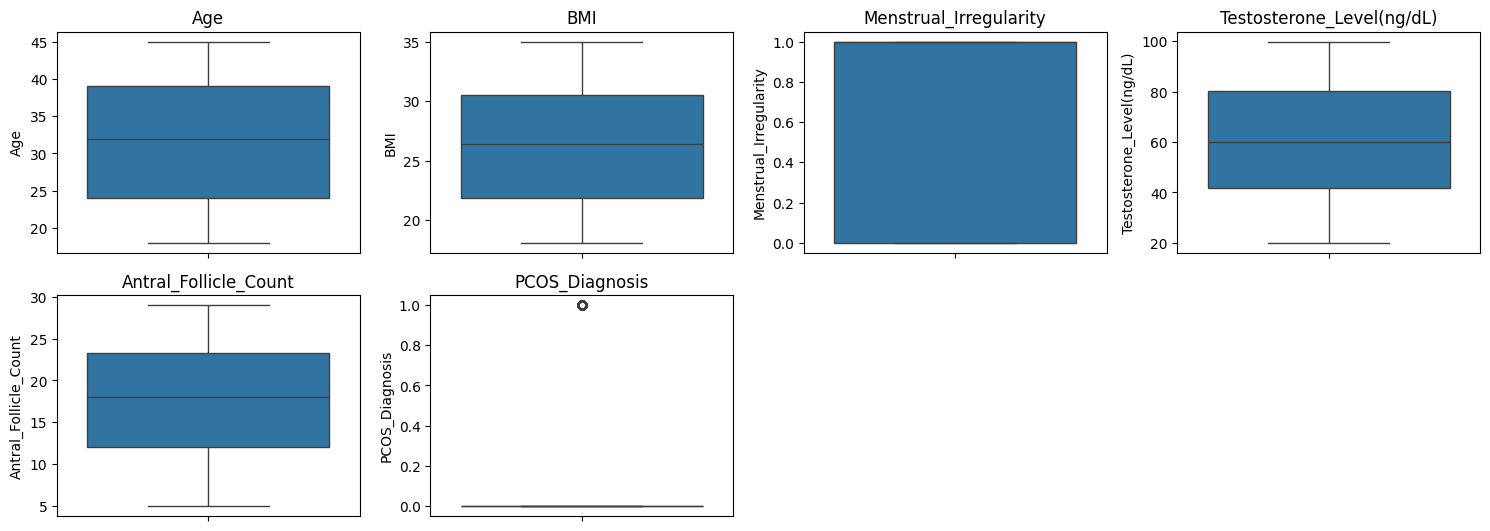

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

#kolom numerik yang ingin dicek outliernya
num_cols = ['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count','PCOS_Diagnosis']

#visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

PCOS_Diagnosis memiliki beberapa titik di atas batas atas atau di luar rentang yang menunjukkan adanya outlier.

Age, BMI, Menstrual_Irregularity, Testosterone_Level(ng/dL), Antral_Follicle_Count memiliki titik di dalam rentang yang tidak menunjukkan adanya outlier.

B. IQR

In [270]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

#cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
BMI: 0 outliers
Menstrual_Irregularity: 0 outliers
Testosterone_Level(ng/dL): 0 outliers
Antral_Follicle_Count: 0 outliers
PCOS_Diagnosis: 199 outliers


Pada IQR menunjukkan adanya outlier pada PCOS_Diagnosis yaitu 199 outliers.

# **Penanganan Outlier**

Berdasarkan jumlah dan dampak outlier metode yang bisa digunakan:
Winsorizing (mengganti outlier dengan batas IQR) Alasan: Jika data penting dan tidak boleh dihapus kita bisa mengganti outlier dengan batas kuartil.

In [271]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

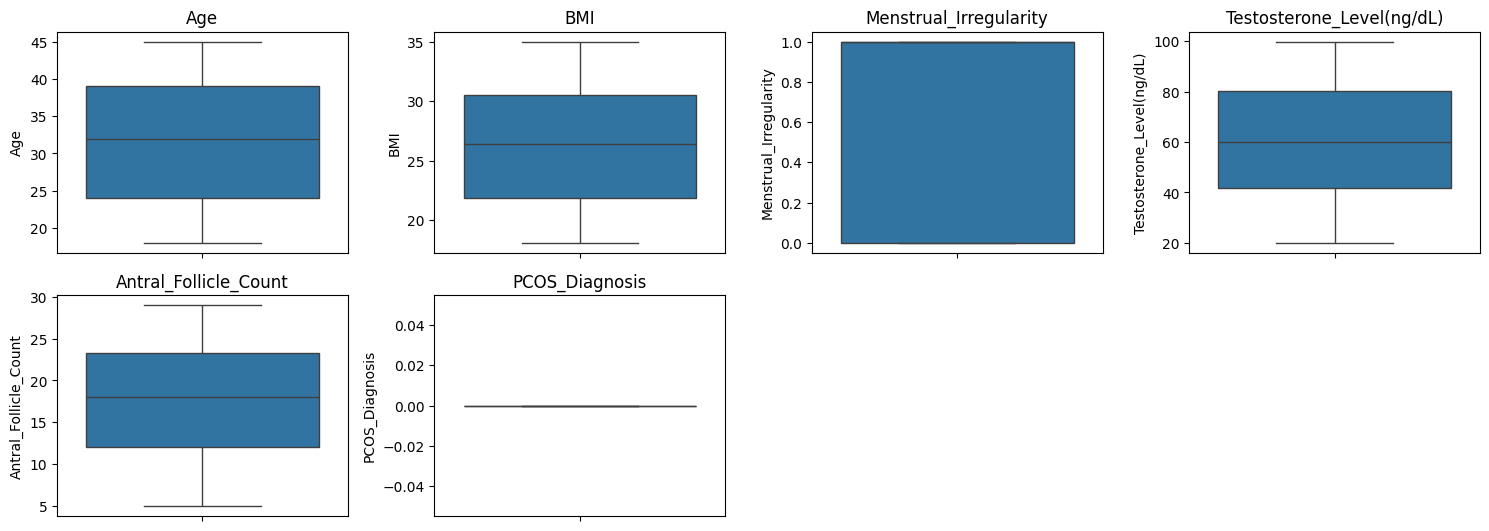

In [272]:
#cek boxplot lagi

num_cols = ['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count','PCOS_Diagnosis']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [273]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

#cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
BMI: 0 outliers
Menstrual_Irregularity: 0 outliers
Testosterone_Level(ng/dL): 0 outliers
Antral_Follicle_Count: 0 outliers
PCOS_Diagnosis: 0 outliers


Output di atas sudah tidak ditemukan outlier.

# **Encoding**

Data tidak memiliki fitur yang kategorik maka tidak perlu dilakukan encoding.

# **K-Nearest Neighbors**

Split dataset untuk membagi dataset menjadi data training dan data testing. Training: data yang sudah diketahui sebelumnya untuk label kelas yang akan
digunakan untuk membangun model classifer. Testing: data yang belum diketahui label kelasnya menggunakan model classifer
yang sudah dibangun.

Besarnya pembagian data:

Pemisahan data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan.  

Pemisahan Standar: Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing.

Data yang Lebih Besar: Jika datasetnya besar pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi juga ingin memiliki cukup data di testing untuk evaluasi yang akurat.

Split dataset dengan besar pembagian 80-20.

In [274]:
from sklearn.model_selection import train_test_split

X = data.drop('PCOS_Diagnosis', axis=1)
y = data['PCOS_Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hasil dari fungsi train_test_split adalah empat keluaran:

X_train: Data training untuk fitur-fitur.

X_test: Data testing untuk fitur-fitur.

y_train: Data training untuk target atau label.

y_test: Data testing untuk target atau label.

Dengan memisahkan dataset menjadi empat bagian X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih. Sehingga dapat membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.





In [275]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 800
Total # of sample in test dataset: 200


In [276]:
print(X_train)

      Age   BMI  Menstrual_Irregularity  Testosterone_Level(ng/dL)  \
29   43.0  18.7                     1.0                       31.3   
535  43.0  19.6                     0.0                       48.8   
695  36.0  22.1                     0.0                       23.5   
557  39.0  26.2                     1.0                       96.1   
836  33.0  20.1                     1.0                       87.9   
..    ...   ...                     ...                        ...   
106  38.0  22.8                     1.0                       81.3   
270  28.0  30.7                     0.0                       93.1   
860  26.0  19.6                     1.0                       68.1   
435  27.0  21.1                     0.0                       21.5   
102  33.0  29.4                     1.0                       44.3   

     Antral_Follicle_Count  
29                    22.0  
535                    6.0  
695                    8.0  
557                   28.0  
836           

In [277]:
print(y_train)

29     0.0
535    0.0
695    0.0
557    0.0
836    0.0
      ... 
106    0.0
270    0.0
860    0.0
435    0.0
102    0.0
Name: PCOS_Diagnosis, Length: 800, dtype: float64


In [278]:
print(X_test)

      Age   BMI  Menstrual_Irregularity  Testosterone_Level(ng/dL)  \
521  33.0  33.0                     1.0                       79.9   
737  43.0  19.4                     0.0                       20.7   
740  23.0  20.7                     1.0                       38.3   
660  22.0  31.2                     1.0                       38.0   
411  34.0  22.6                     0.0                       80.9   
..    ...   ...                     ...                        ...   
408  21.0  31.9                     0.0                       50.0   
332  44.0  25.0                     0.0                       22.2   
208  40.0  34.1                     1.0                       35.7   
613  35.0  18.8                     1.0                       97.1   
78   25.0  27.7                     1.0                       79.9   

     Antral_Follicle_Count  
521                    8.0  
737                   14.0  
740                   27.0  
660                   22.0  
411           

In [279]:
print(y_test)

521    0.0
737    0.0
740    0.0
660    0.0
411    0.0
      ... 
408    0.0
332    0.0
208    0.0
613    0.0
78     0.0
Name: PCOS_Diagnosis, Length: 200, dtype: float64


Feature scaling

Transformasi dan normalisasi data dilakukan supaya data dapat digunakan dalam algoritma KNN atau Naive Bayes.

In [280]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [281]:
print(X_train)

[[ 1.33544048 -1.5873654   0.92761259 -1.23353925  0.63451998]
 [ 1.33544048 -1.40290421 -1.07803625 -0.48614354 -1.61654868]
 [ 0.50771865 -0.89051202 -1.07803625 -1.5666642  -1.3351651 ]
 ...
 [-0.67474109 -1.40290421  0.92761259  0.33812716  0.3531364 ]
 [-0.55649512 -1.0954689  -1.07803625 -1.65208085  1.19728714]
 [ 0.15298073  0.6056732   0.92761259 -0.67833101  1.19728714]]


In [282]:
print(X_test.dtype)

float64


Model KNN

In [283]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i-x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[] #calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1]) #sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get fist k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neigbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [284]:
model=KNN(50)
model.fit(X_train,y_train)

50


In [285]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [286]:
model = []
model.append(('KNN', KNeighborsClassifier()))

Prediksi KNN berdasarkan model yang dibangun

Modelling dengan KNN

In [287]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#definisikan nilai K dan buat objek KNN regressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)

#fitkan model KNN ke data train
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [288]:
# Lakukan prediksi pada data train dan dataset
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [289]:
#Hitung MSE untuk data train dan data test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [290]:
print("MSE data train:", mse_train)
print("MSE data test:", mse_test)

MSE data train: 0.0
MSE data test: 0.0


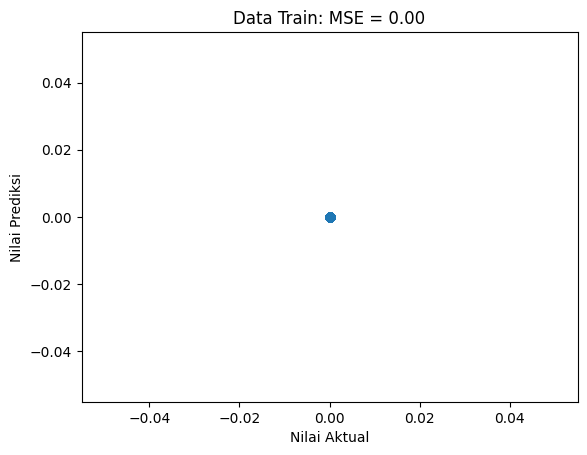

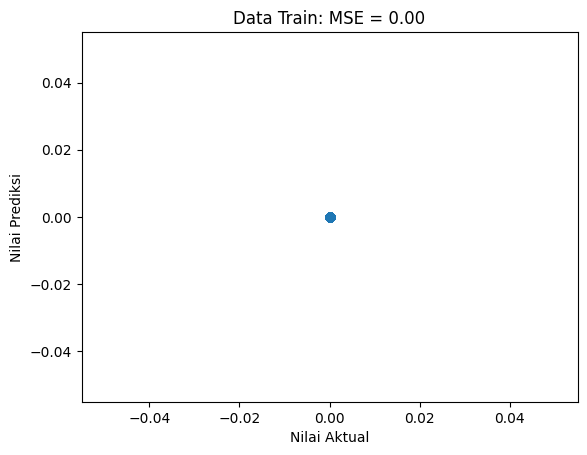

In [291]:
import matplotlib.pyplot as plt

# Plot data train
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

# Plot dataset
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

Visualisasi di atas menggambarkan dimana nilai prediksi dan nilai aktual sama dan model memiliki tingkat akurasi yang baik.

Hasil evaluasi nilai akurasi algoritma KNN dan confusion matriks.

In [292]:
y_pred = classifier.predict(X_test)

In [293]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[200]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


1.0

In [294]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[200]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


1.0

Nilai akurasi algoritma KNN adalah 100%.

# **Naive Bayes**

In [295]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [296]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [297]:
# compute the accuracy of train set
nb.score(X_train, y_train)

1.0

In [298]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [299]:
from sklearn.metrics import accuracy_score

In [300]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 1.0000


Membuat model dengan neural network

In [301]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [302]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 100}


In [303]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

Pada kasus ini, model MLPClassifier dibuat untuk membuat model Neural Network berbasis Multi-Layer Perceptron (MLP) dengan parameter tertentu yang telah ditentukan secara manual dan melatihnya pada data training. Parameter-parameter ini adalah:

hidden_layer_sizes=(50,): Ini adalah tuple yang menunjukkan arsitektur dari jaringan saraf. (50,) berarti terdapat satu hidden layersberisi 50 neuron.

learning_rate_init=0.1: Parameter ini adalah tingkat pembelajaran awal. Ini menunjukkan seberapa besar model akan menyesuaikan bobotnya berdasarkan kesalahan pada setiap iterasi.

max_iter=100: Parameter ini menunjukkan jumlah maksimum iterasi yang akan dilakukan saat melatih model. Ini mengontrol seberapa banyak iterasi atau epoch yang akan dilakukan selama proses pelatihan.

In [304]:
y_pred = clf.predict(X_test)

In [305]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


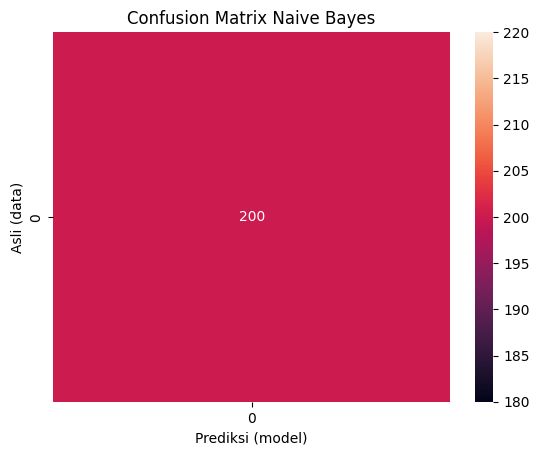

In [306]:
# Visualisasi Confusion Matrix
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_predict['NB'] are your true and predicted labels for Naive Bayes
cm_nb = confusion_matrix(y_test, y_predict['NB'])  # Calculate the confusion matrix

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='rocket')
plt.xlabel('Prediksi (model)')
plt.ylabel('Asli (data)')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

In [307]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

1.0

Output 0.1 menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Sehingga model berhasil memprediksi benar sekitar 100% dari semua sampel pada data uji yang digunakan. Hasil ini sama dengan hasil akurasi menggunakan KNN yaitu 100% sehingga KNN dan Naive Bayes sama akuratnya.

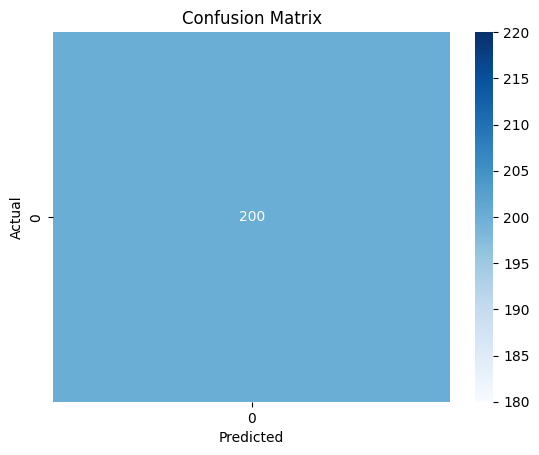

In [308]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()